In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 차원축소 

- 차원의 저주(Curse of Dimensionality): 데이터의 차원이 너무 크면 모델을 학습하는데 여러가지 문제점이 있을수 있다.
- 데이터간의 거리가 기하적으로 멀어지며 희소(sparse)한 구조를 갖게된다. 따라서 데이터 거리기반의 알고리즘 (KNN, SVM)에 부적합해지며, 과적합의 위험성도 커지고 계산속도도 저하된다. 
- 피쳐가 많다는 의미는 그만큼 다중공선성(multi-collinearity) 문제가 발생할 경향이 크다. 
- 이러한 이유로 우리는 고차원 데이터에 대해, 전처리 과정 중 하나로 차원축소를 진행하는데, 방법은 크게 두가지이다. 
- Feature Selection : 특정 피처에 종속성이 강한 불필요한 피처는 제거하고 독립적인 피처들만 선택
- Feature Extraction : 기존 피처들을 저차원의 새로운 중요 피처(Latent Factor)들로 압축

1. PCA (Principle Component Analysis) : 주성분 분석
- projection 했을 때 데이터의 분산을 가장 잘 살리는 방향으로 주성분을 찾는다. 
- PCA는 공분산 행렬 기반이기 때문에, 변수들의 영향력을 공평하게 하기위해 적용하기 전에는 꼭 개별 피쳐를 scaling 해줘야한다.

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:, :-1])

from sklearn.decomposition import PCA
pca = PCA(n_components=2)                                            
# fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환    
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
# iris_pca = pca.fit_transform(iris_scaled)도 가능                                                 
print(iris_pca.shape)
 
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

(150, 2)


,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


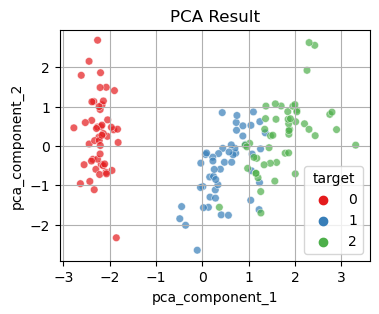

[0.72962445 0.22850762]


In [9]:
# 2개의 PCA축의 설명력을 plot 으로 시각화 및 설명력 출력함수 확인
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(df, x, y, labels, title="PCA Result"):
    plt.figure(figsize=(4,3))
    sns.scatterplot(x=df[x], y=df[y], hue=df[labels], palette='Set1', s=30, alpha=0.7)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_data(irisDF_pca, x='pca_component_1', y='pca_component_2', labels='target')  
print(pca.explained_variance_ratio_)  # 출력결과 : [0.7296 0.2285] 각 PC 축의 설명력을 의미함.

피쳐가 수십개 이상이면, 속성간에 상관관계를 먼저 탐색하고 (corr매서드 및 heatmap) 상관관계가 높은 피쳐들을 중심으로 차원축소(PCA 한다)

<Axes: >

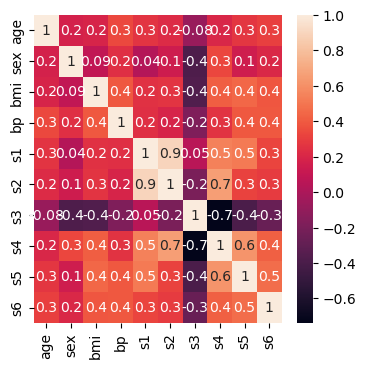

In [ ]:
# PCA 전에 데이터간 상관성 확인하기.
# 아래 예시에서는 s1,s2,s4,s5 정도를 묶어서 PCA 하면 좋다는 판단

from sklearn.datasets import load_diabetes
data = load_diabetes()
x_df = pd.DataFrame(data.data, columns=data.feature_names)
x_df

corr = x_df.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr, annot=True, fmt='.1g')

2. LDA (Linear Discriminant Analysis) : 선형 판별 분석법
- PCA와 같이 저차원으로 projection 하는 기법이지만, LDA는 분류모델에서 사용하기 쉽도록 클래스를 분류할 수 있는 기준을 최대한 유지하면서 차원축소한다. 
- LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분류할 수 있는 축을 찾는다. (PCA는 분산이 가장 큰 축) 아래 그림에서는 왼쪽보다 오른쪽 축이 LDA 측면에서 더 잘 projection한 축이다. 
- PCA는 라벨이 필요없는 비지도학습 ↔ LDA는 라벨이 필요한 지도학습. 따라서 아래코드와 같이 target데이터를 함께 줘야한다. 

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # LDA fit호출할때(축을 찾을때) 피쳐,라벨 정보 둘다 줘야함
iris_lda = lda.transform(iris_scaled) # LDA transform호출할때(차원 축소할때) 피쳐만 입력   
print(iris_lda.shape)

(150, 2)


3.  SVD (Linear Discriminant Analysis) : 특이값 분해 
- https://angeloyeo.github.io/2019/08/01/SVD.html 블로그 참고 
- 고차원의 희소행렬 데이터 (문서,텍스트) 처리에 유리함
- 사실 PCA 나 SVD 간에 결과는 별 차이 없음. 차이는 PCA 는 Dense matrix에 대해서만 가능. SVD 는 Sparse에도 가능. 

Text(0, 0.5, 'TruncatedSVD Component 2')

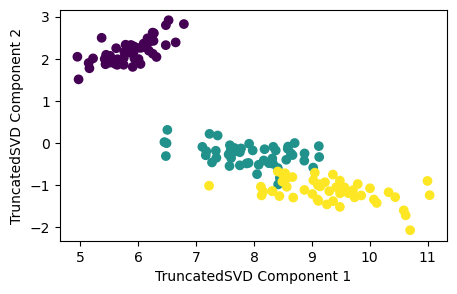

In [20]:
from sklearn.decomposition import TruncatedSVD

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris.data)
iris_tsvd = tsvd.transform(iris.data)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 
plt.figure(figsize=(5,3))
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')